In [1]:
from pyforest import *

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
df_main=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

<IPython.core.display.Javascript object>

In [4]:
df_salary_portion = df_main[df_main.txn_description=="PAY/SALARY"].groupby("customer_id").mean()
df_salary_portion.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [6]:
salaries = []
for cust_id in df_main["customer_id"]:
    salaries.append(int(df_salary_portion.loc[cust_id]["amount"]))    
df_main["annual_salary"] = salaries

In [7]:
df_cust = df_main.groupby('customer_id').mean()

In [8]:
df_cust.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


### Checking the correlation between the features w.r.t target variable(annual salary)

0.231963096050887


<IPython.core.display.Javascript object>

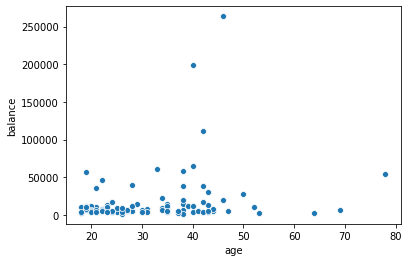

In [9]:
print(df_cust['age'].corr(df_cust['balance']))
sns.scatterplot(x=df_cust.age, y=df_cust.balance)

-0.13522694954964612


<IPython.core.display.Javascript object>

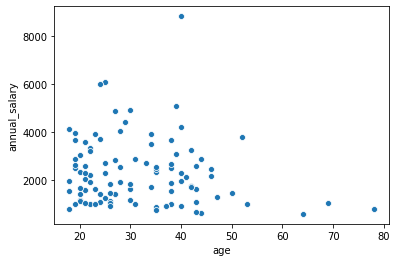

In [10]:
print(df_cust.age.corr(df_cust.annual_salary))
sns.scatterplot(x=df_cust.age, y=df_cust.annual_salary)

### Predictive analysis using regression techniques

#### Linear Regression

In [11]:
n = int(len(df_cust)*0.7)
x_train = df_cust.drop("annual_salary", axis=1).iloc[:n]
y_train = df_cust["annual_salary"].iloc[:n]
x_test = df_cust.drop("annual_salary", axis=1).iloc[n:]
y_test = df_cust["annual_salary"].iloc[n:]

In [12]:
lin_reg=LinearRegression()

In [13]:
lin_pred=lin_reg.fit(x_train,y_train).predict(x_test)

In [26]:
print('training Score is',lin_reg.score(x_train,y_train))
print('testing Score is',lin_reg.score(x_test,y_test))

training Score is 0.24688973319615712
testing Score is -0.23854072913735003


#### Decision Tree Regression

In [27]:
df_categorical = df_main[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [30]:
dummified_df=pd.get_dummies(df_categorical)

<IPython.core.display.Javascript object>

In [35]:
dummified_df.head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [31]:
n1 = int(len(df_main)*0.7)
xtrain = dummified_df.iloc[:n1]
ytrain = df_main["annual_salary"].iloc[:n1]
xtest =dummified_df.iloc[n1:]
ytest = df_main["annual_salary"].iloc[n1:]

In [32]:
dt=DecisionTreeRegressor()

In [33]:
dt_pred=dt.fit(xtrain,ytrain).predict(xtest)

In [34]:
print('training Score is',dt.score(xtrain,ytrain))
print('testing Score is',dt.score(xtest,ytest))

training Score is 0.7524228033767403
testing Score is 0.6809735345254173
